In [96]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [97]:
#importing or loading the train dataset
pd.set_option('display.max_columns', None) #for displayig all the columns
df = pd.read_csv(r'C:\Users\Shashanka S\Desktop\evaluation projects\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

We have to analyse and predict this attrition

In [98]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Most of the input feature columns available are of ordinal in nature

Also we need to encode the ordinal columns using ordinal encoder, all binary class type categorical columns with onehot encoder

Other multiclass categorical columns can be encoded with binary encoder

The target feature attrition is of binary categorical tpe, which can be encoded using label encoder

The given dataset is having huge number of columns, feature selection techinque must be done well

In [99]:
#Checkin for data shape
df.shape

(1470, 35)

In [100]:
#Checking data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [101]:
#Checking any null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values present

In [102]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [103]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Age : False
For column of Attrition : False
For column of BusinessTravel : False
For column of DailyRate : False
For column of Department : False
For column of DistanceFromHome : False
For column of Education : False
For column of EducationField : False
For column of EmployeeCount : False
For column of EmployeeNumber : True
For column of EnvironmentSatisfaction : False
For column of Gender : False
For column of HourlyRate : False
For column of JobInvolvement : False
For column of JobLevel : False
For column of JobRole : False
For column of JobSatisfaction : False
For column of MaritalStatus : False
For column of MonthlyIncome : False
For column of MonthlyRate : False
For column of NumCompaniesWorked : False
For column of Over18 : False
For column of OverTime : False
For column of PercentSalaryHike : False
For column of PerformanceRating : False
For column of RelationshipSatisfaction : False
For column of StandardHours : False
For column of StockOptionLevel : False
For col

Only employee number is having unique entries. Except that no column is having completely unique entries, all are having repeated catergorical/ordinal entries

In [104]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (1470, 35)
Size after:  (1470, 35)


Therefore no duplicate rows present in the dataset

In [105]:
#Checking of value counts in each columns having categorical/ordinal feature columns
for i in df:
    print(df[i].value_counts(),'\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64 

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

1) Using employee number (ID), which is having all unique entires doesnot help in predictions

Rather it will cause overfitting of model

It is better to drop it

2) Also Employee count has all same entries as 1, lets drop it

3) Over18 is having all Y data, which means all employees are above 18. No need to keep this data

3) Standard hrs is having all data as 80 hrs. No need to keep this data also.

In [107]:
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('EmployeeCount', axis=1)
df = df.drop('Over18', axis=1)
df = df.drop('StandardHours', axis=1)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [114]:
#Seperating data for vizualization purpose 
#Let us take multiclass categorical data more than 10 numerical class (orders) as discrete data for vizualization
discrete = df[['Age','DistanceFromHome','DailyRate','HourlyRate','MonthlyIncome','TotalWorkingYears', 'PercentSalaryHike',
            'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

categorical = df[['BusinessTravel','Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement',
               'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked','OverTime', 'PerformanceRating',
               'RelationshipSatisfaction','StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']]

target = df[['Attrition']]

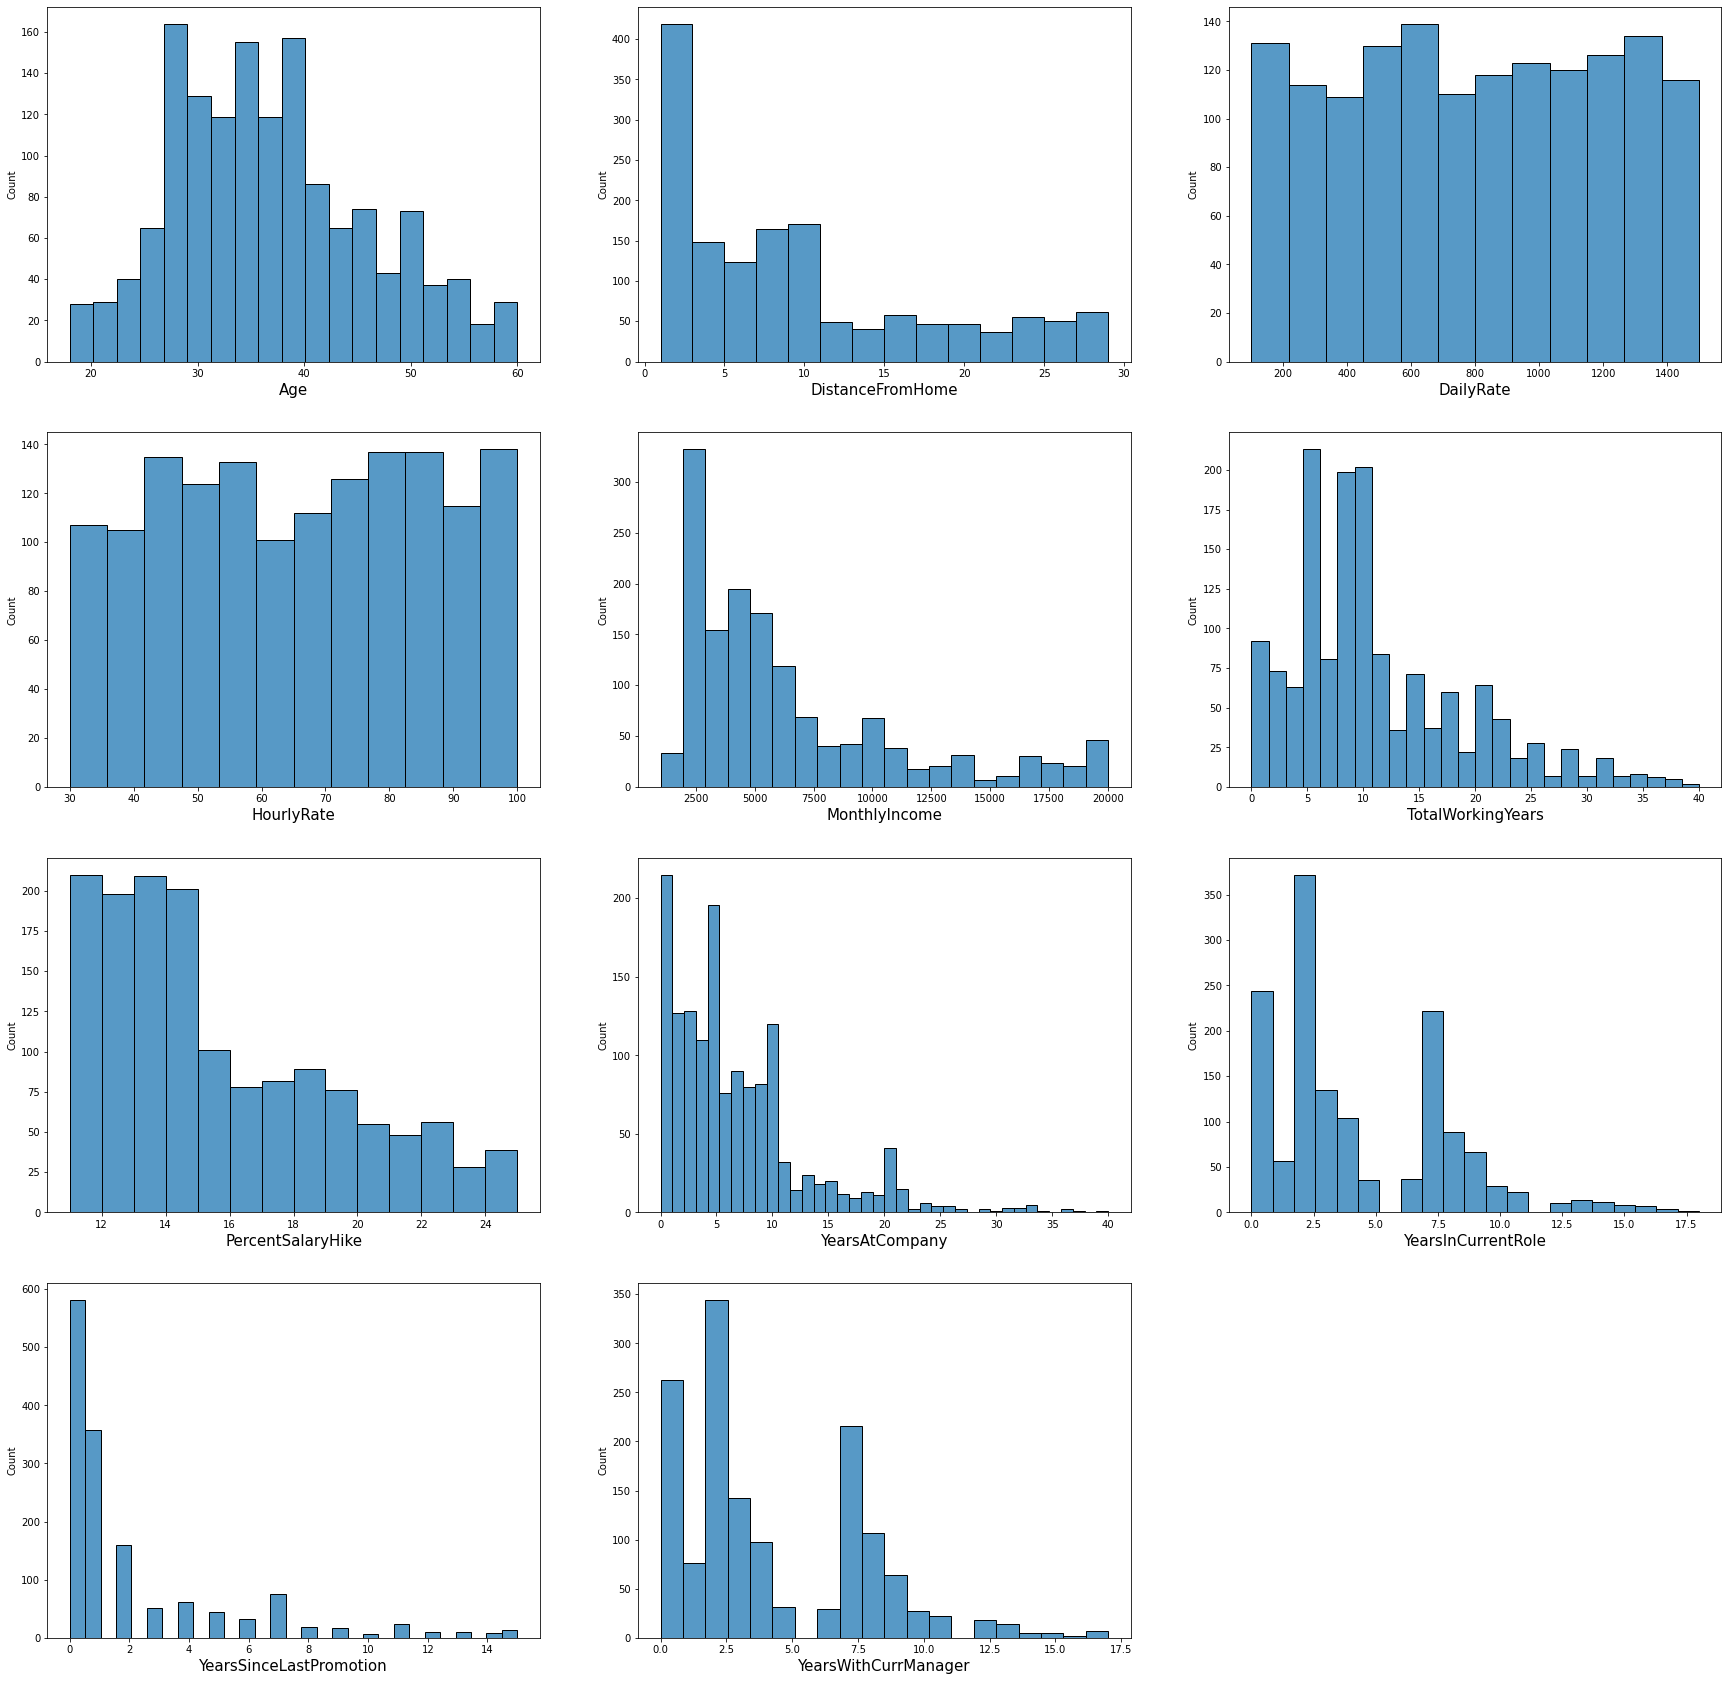

In [119]:
#Discrete
#Checking of value counts in each columns having categorical/ordinal input features
plt.figure(figsize=(30,30))
pltno = 1
for columns in discrete:
    if pltno <=12:
        ax = plt.subplot(4,3,pltno)
        sns.histplot(discrete[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

Observations:

1) Average age of employees is around 3 years

2) For most of the employees distance from home within 10 kms

3) Daily rate almost vary uniformly from 200 to 1400

4) Hourly rate almost vary uniformly from 20 to 100

5) Monthly income of most are leaa than 7500

6) Total working years of average lies within 5 to 15 years

7) Average salary hike of majority of employees is about 10 to 15 percent

8) Years of work experience in that company of majority of employees is between 0 to 10 years

9) Years in current role, years since last promotion, years with current manager all these data shows same decreasing trend in number of counts.

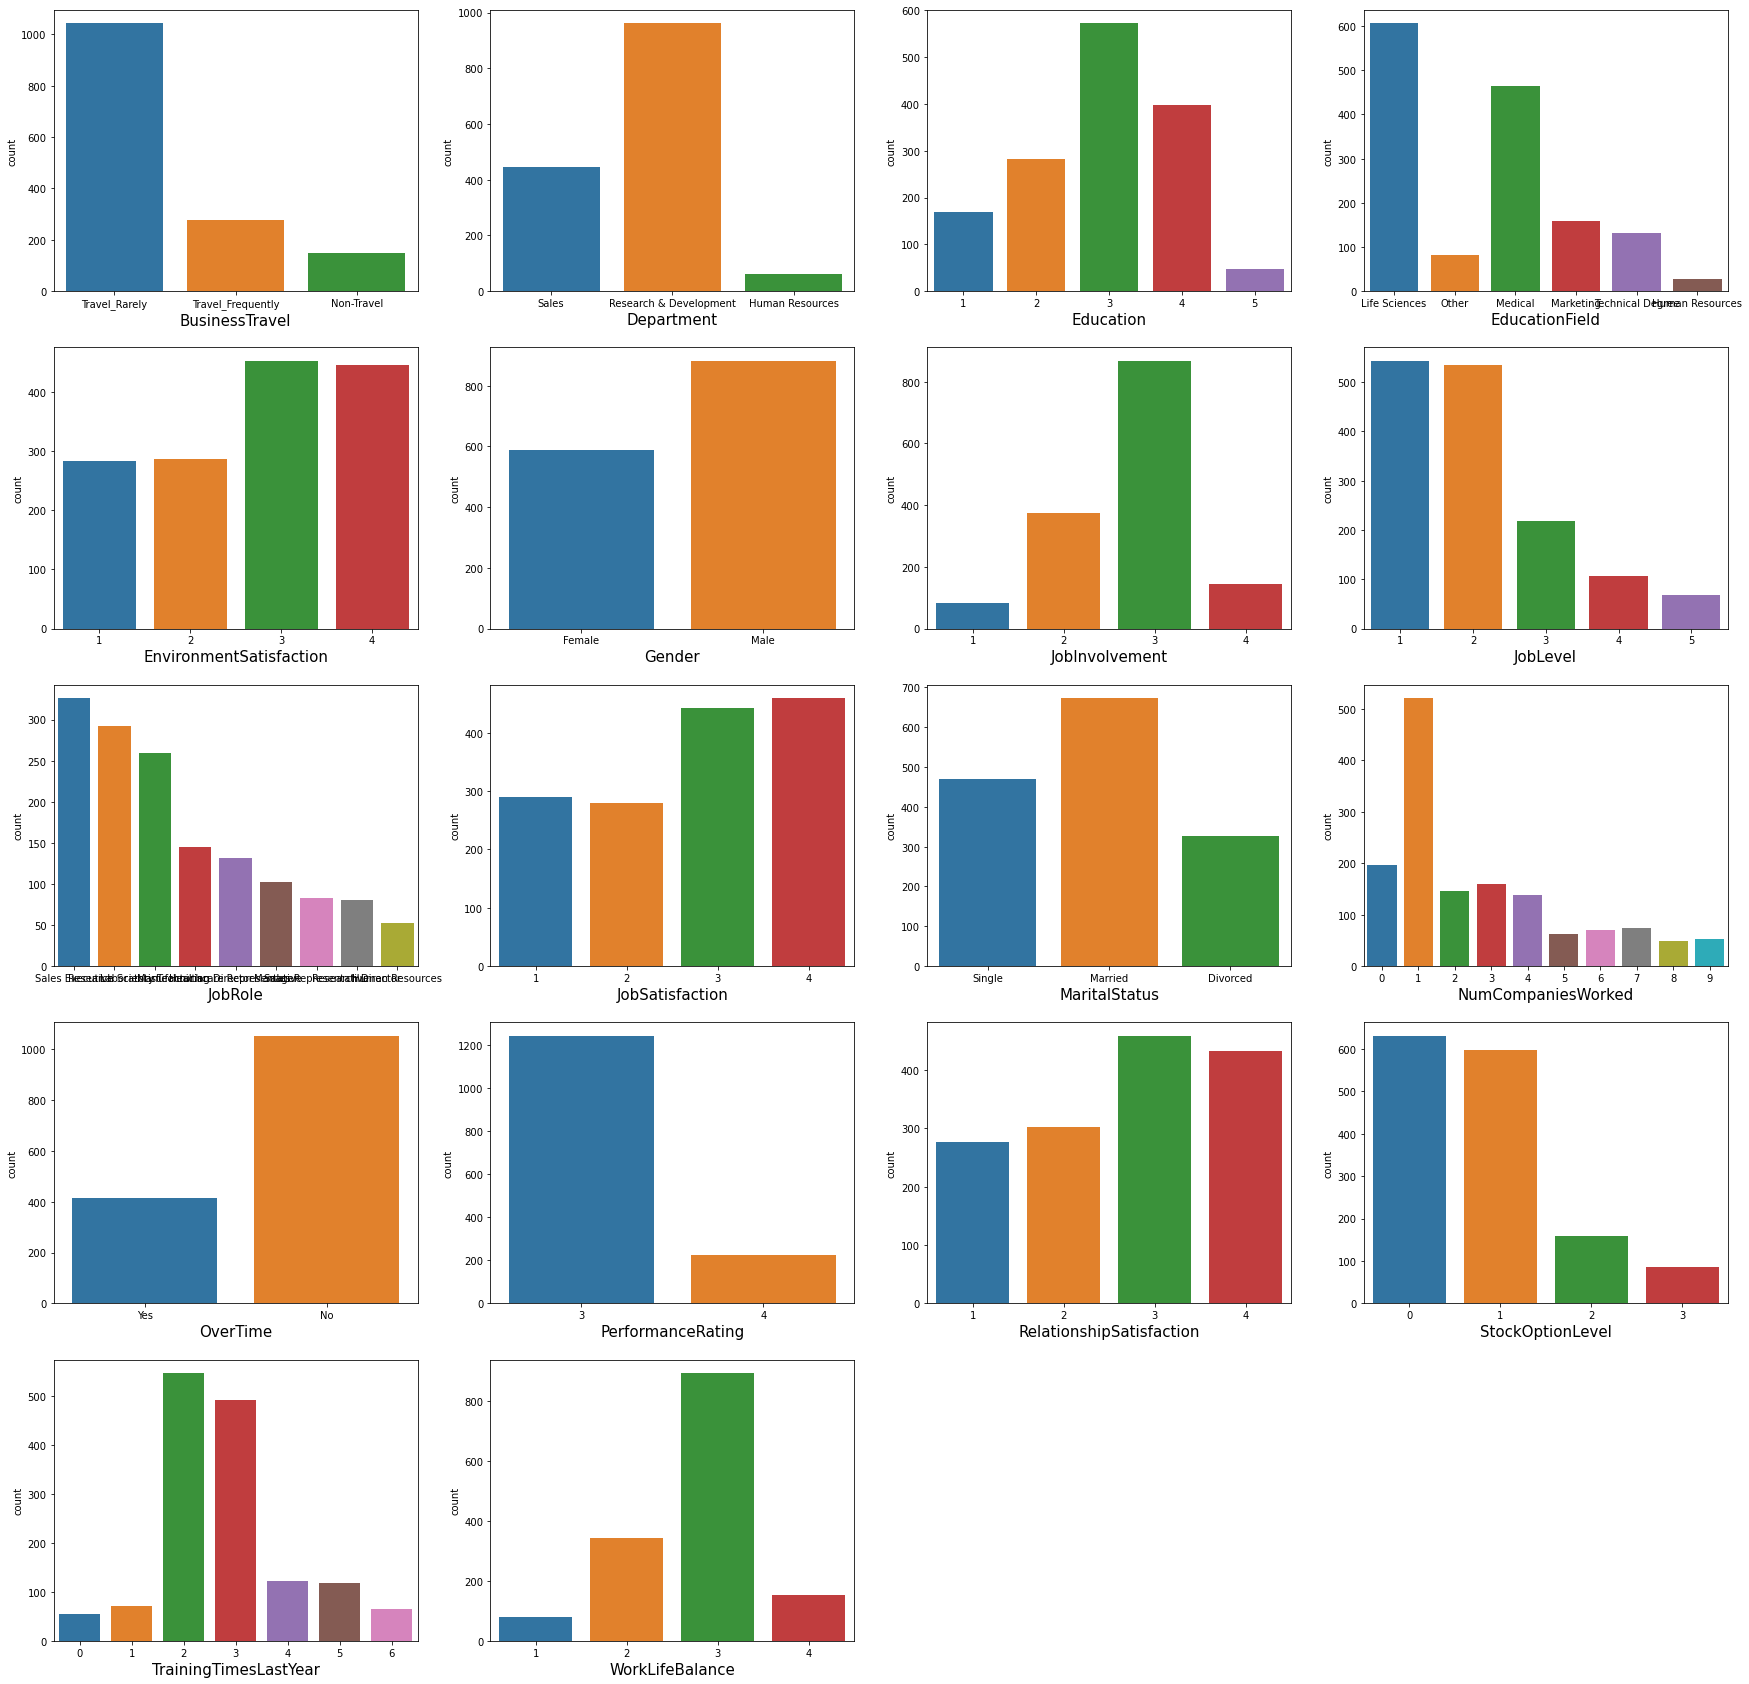

In [117]:
#Categorical
#Checking of value counts in each columns having categorical/ordinal input features
plt.figure(figsize=(30,30))
pltno = 1
for columns in categorical:
    if pltno <=19:
        ax = plt.subplot(5,4,pltno)
        sns.countplot(categorical[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

Observations:

1) Most of the employees need to travel rarely

2) Most of the employees are from R&D department, followed by sales and HR

3) Education rating of most of employees is average of 3

4) Most are from life science background follwed by medical field

5) More number of male employees present. M:F = 8.5/6

6) Job involvement rating of most of employees is about 3/4

7) Most of the employees are at entry level i.e 1/5 and 2/5

8) Most employees are from Sales and least from HR

9) Job satisfaction rating is 4/4 and 3/4 of most of employees

10) Majority are married employees, followed by single and divorced in count

11) Majority of employees are in their second job (they have already worked with 1 company in past). There are employes even with 9 companies hanged.

12) Most of them are not doing overtime. OT y:n ratio is in 1:3

13) Performance rating of most are 3/4 followed by 4/4

12) Relationship with company rating level of most is 3/4 and least is 1/4

13) Most of the employees are at 0 stock level of company followed by 1 stock level

14) Majority of employees have undergone 2-3 times training on average.

15) Work life balance rating in the company is 3/4 for most of the employees

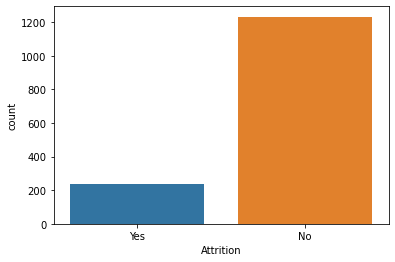

In [122]:
#Target
#Checking of value counts in target column
sns.countplot(df['Attrition'])
plt.xlabel('Attrition')       
plt.show()

We can see label is having highly imbalanced data. Need to be balanced using sampling techniques. yes to no ratio is 1:6 almost.

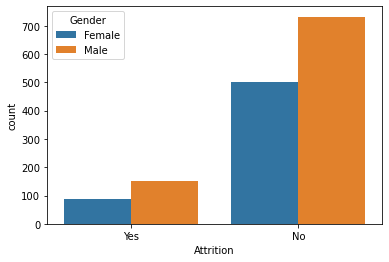

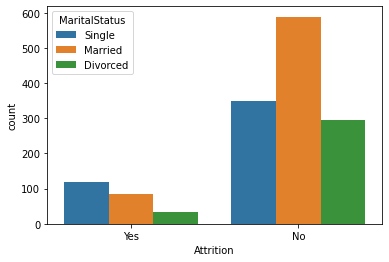

In [126]:
sns.countplot(df['Attrition'], hue=df['Gender'])      
plt.show()

sns.countplot(df['Attrition'], hue=df['MaritalStatus'])      
plt.show()

Attrition count of male employees are more compared to female

Attrition rate is more singles and retention rate is more among married employees

This suggests that married employees or people tends to settle down at a place or company compared to single or divorced people

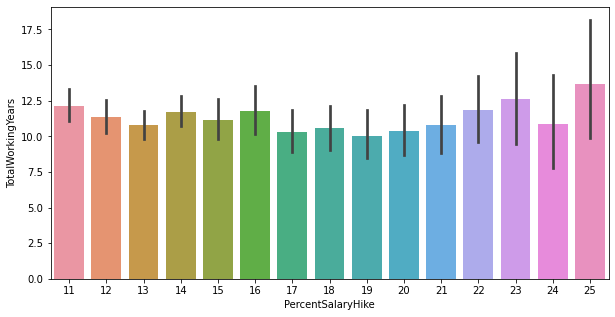

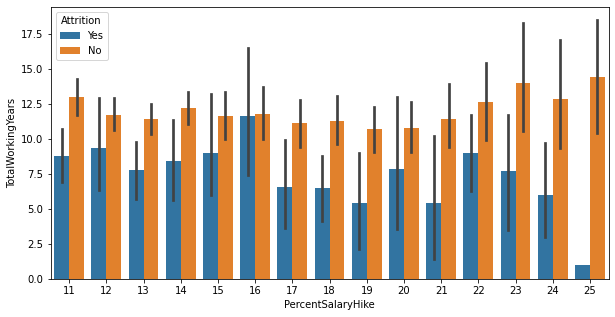

In [137]:
plt.figure(figsize=(10,5))
sns.barplot(y = df['TotalWorkingYears'], x=df['PercentSalaryHike'])      
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(hue=df['Attrition'], y = df['TotalWorkingYears'], x=df['PercentSalaryHike'])      
plt.show()

We can observe that greater the Total years of working, greater is the salary hike

When 25% salary is hiked for 17+ years work exp people, retention rate is very high

Even though 25% salary is hiked for 1+ years work exp people, attrition occured

For an average work exp of 12 years and salary hike of 16%, attrition and retention rate is in balanced condition

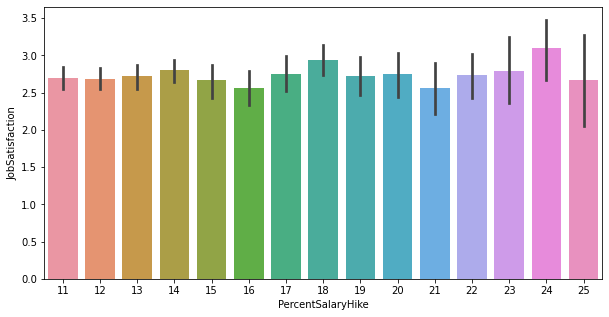

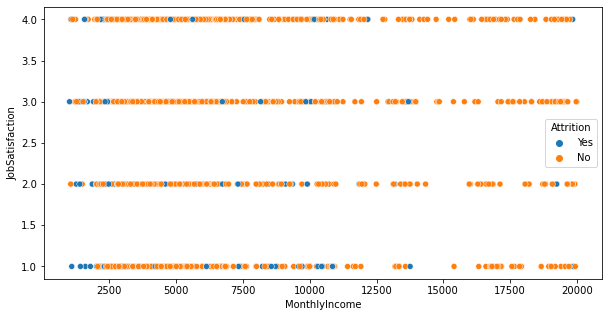

In [151]:
plt.figure(figsize=(10,5))
sns.barplot(y = df['JobSatisfaction'], x=df['PercentSalaryHike'])      
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(y = df['JobSatisfaction'], x=df['MonthlyIncome'], hue = df['Attrition'])      
plt.show()

Higher level job satisfaction with higher monthly income having employees tends to have more retention

Lower level job satisfaction and lower monthly income having employees tends to have more attrition

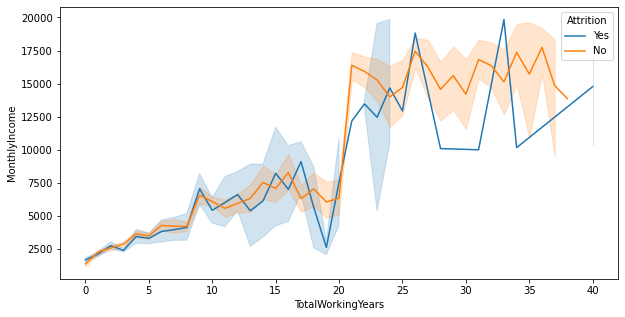

In [153]:
plt.figure(figsize=(10,5))
sns.lineplot(y = df['MonthlyIncome'], x = df['TotalWorkingYears'], hue = df['Attrition'])
plt.show()

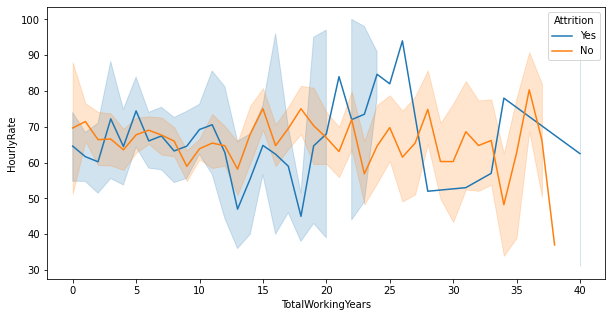

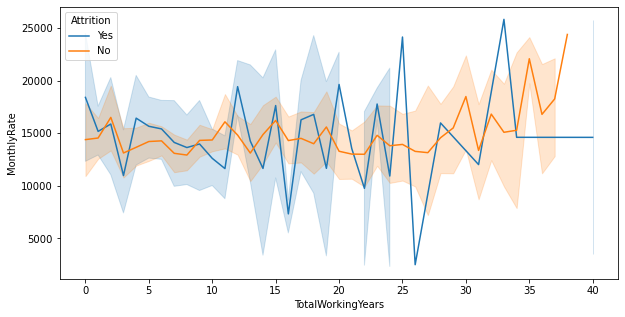

In [154]:
plt.figure(figsize=(10,5))
sns.lineplot(y = df['HourlyRate'], x = df['TotalWorkingYears'], hue = df['Attrition'])
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(y = df['MonthlyRate'], x = df['TotalWorkingYears'], hue = df['Attrition'])
plt.show()

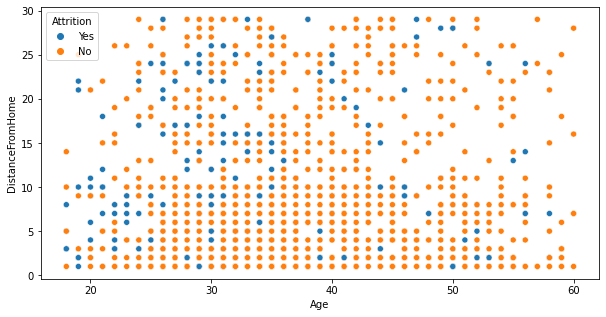

In [158]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['DistanceFromHome'], x=df['Age'], hue = df['Attrition'])      
plt.show()

When office is at more distance and attrition rate is more in age younger than 40 yrs

Retention rate is more when sistance between office and home is less than 10 and age group of employees is between 25 to 50 years

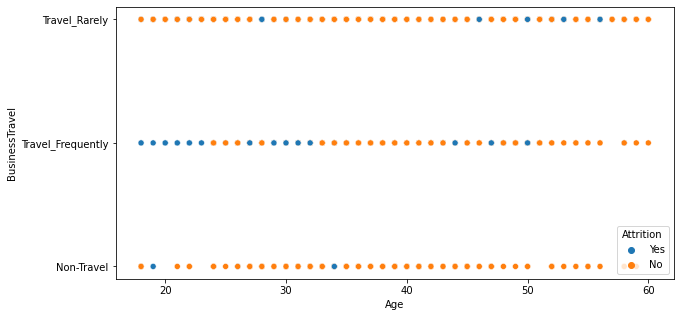

In [163]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['Age'], y=df['BusinessTravel'], hue = df['Attrition'])      
plt.show()

Attrition rate is more if employee business travel is more frequent for less than 35 yar age group

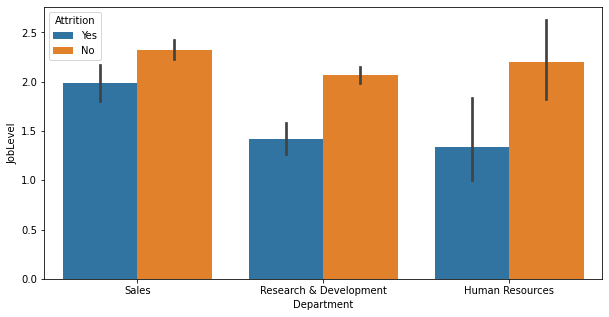

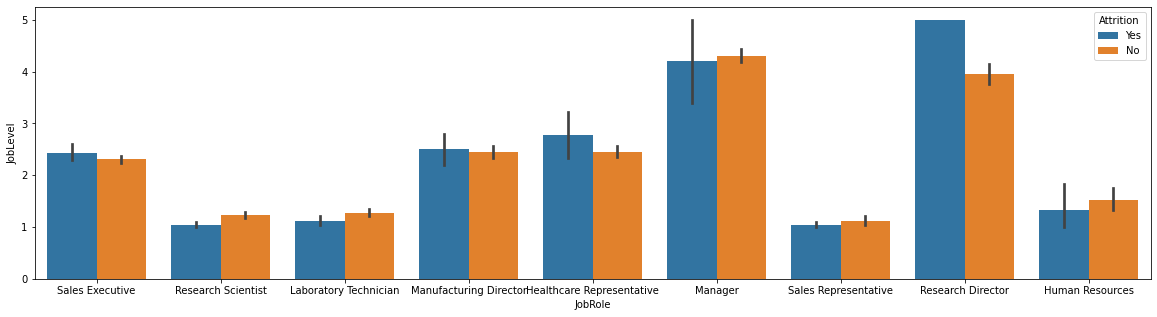

In [166]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['Department'], y=df['JobLevel'], hue = df['Attrition'])      
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = df['JobRole'], y=df['JobLevel'], hue = df['Attrition'])      
plt.show()

In each department at higher job level retention is more

But in each job role it is different:
    
Example, at manager role almost attrition and retention are almost balanced at higher level of job

Example, at Research  director role almost attrition is more at high job level(5) compared to job level(4)

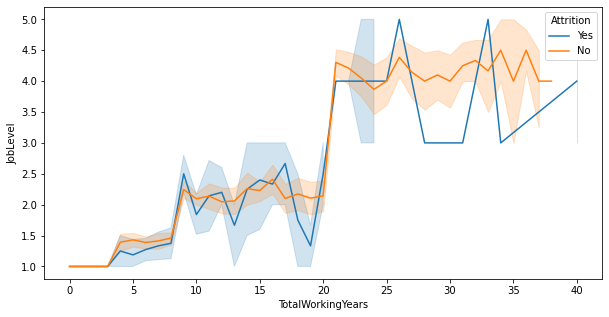

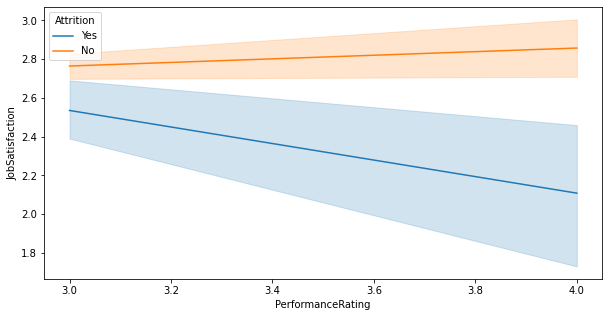

In [170]:
plt.figure(figsize=(10,5))
sns.lineplot(y = df['JobLevel'], x = df['TotalWorkingYears'], hue = df['Attrition'])
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(y = df['JobSatisfaction'], x = df['PerformanceRating'], hue = df['Attrition'])
plt.show()

When performance rating is more job staisfaction is more among the retention employees

When performance rating is more job staisfaction is less among the attrition employees

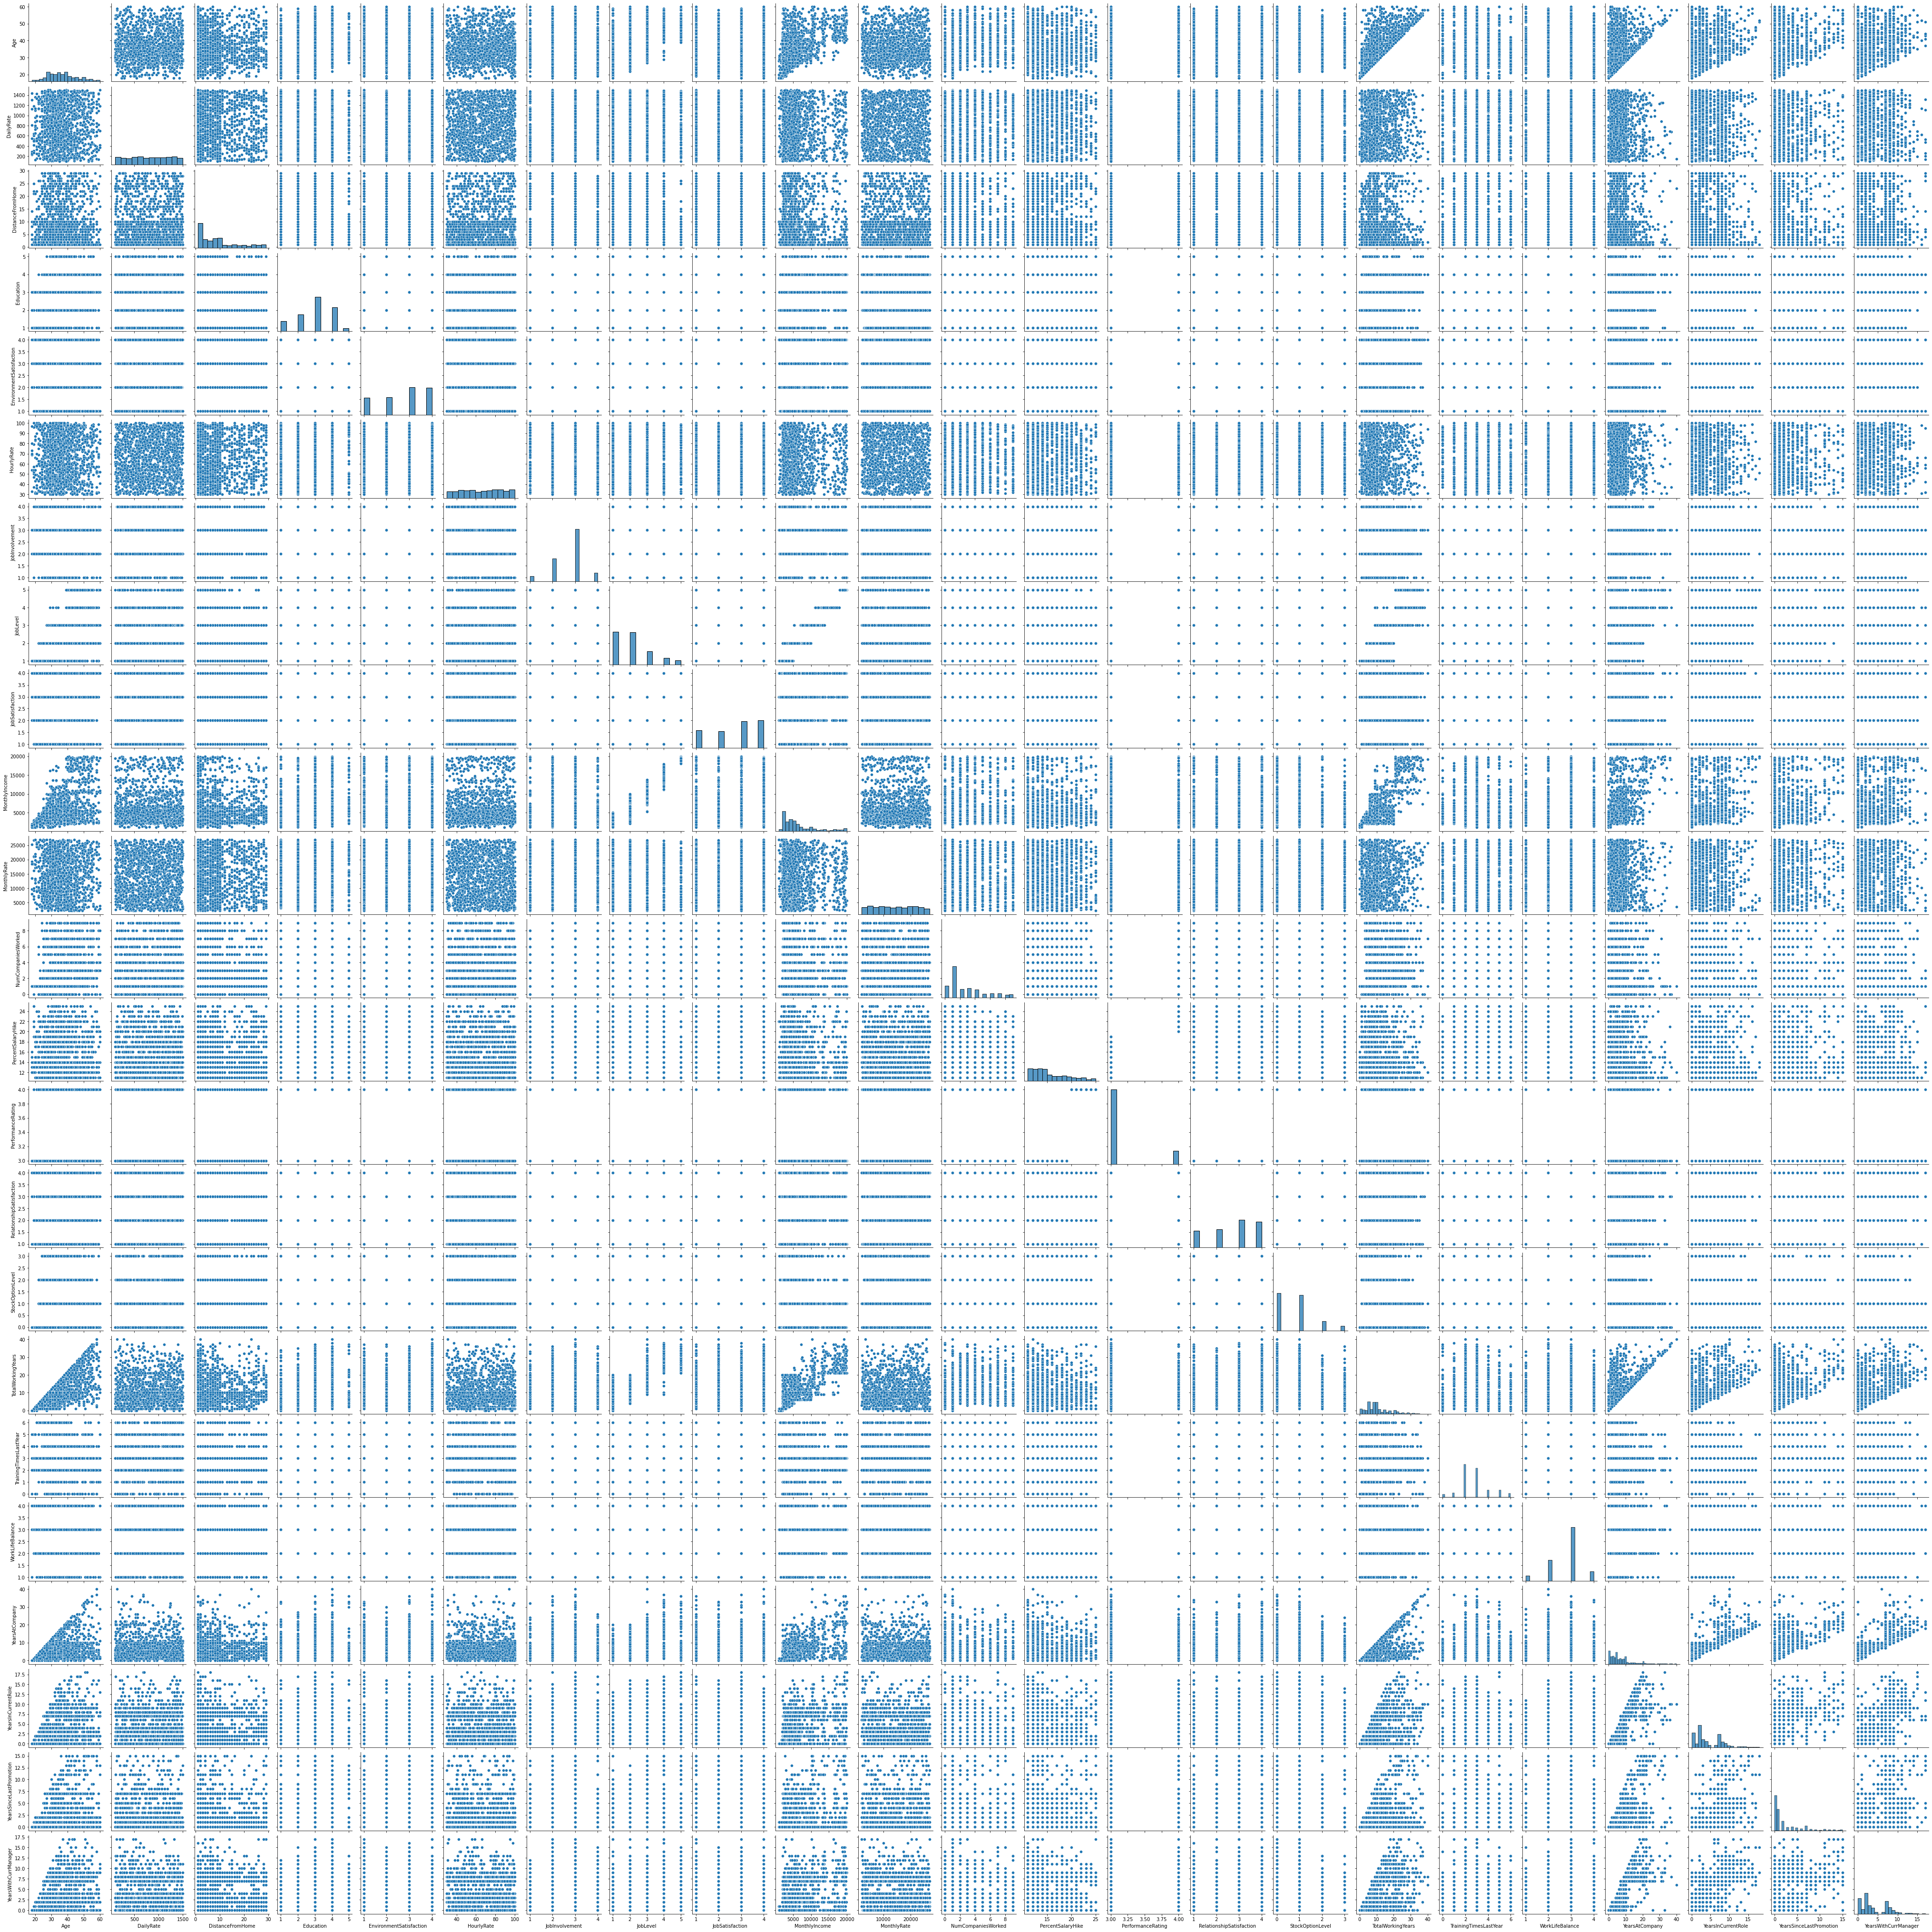

In [171]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

Multicollinearity exists between some input feature columns, same should be handled by feature selection techniques: based on Chi2 and p value

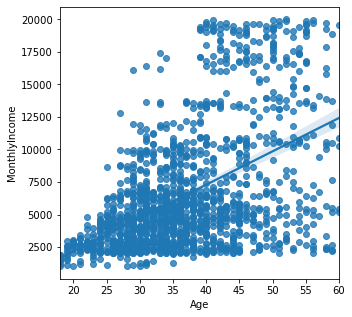

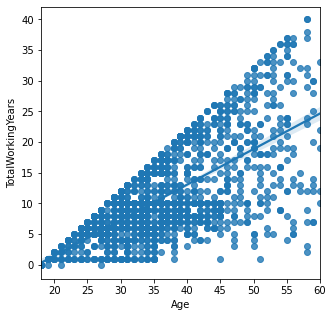

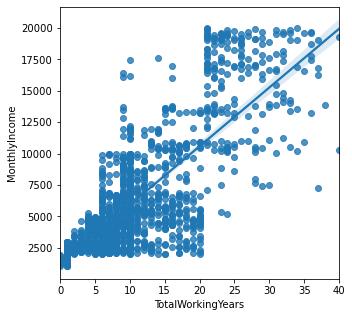

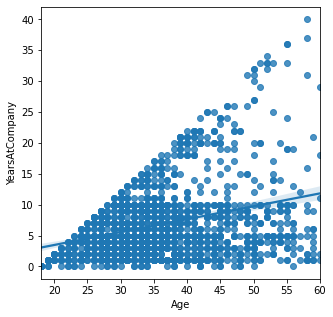

In [172]:
plt.figure(figsize=(5,5))
sns.regplot(y = df['MonthlyIncome'], x = df['Age'])
plt.show()

plt.figure(figsize=(5,5))
sns.regplot(y = df['TotalWorkingYears'], x = df['Age'])
plt.show()

plt.figure(figsize=(5,5))
sns.regplot(y = df['MonthlyIncome'], x = df['TotalWorkingYears'])
plt.show()

plt.figure(figsize=(5,5))
sns.regplot(y = df['YearsAtCompany'], x = df['Age'])
plt.show()

These plots are showing signs of multicollinearity. Having strong positive relationship.

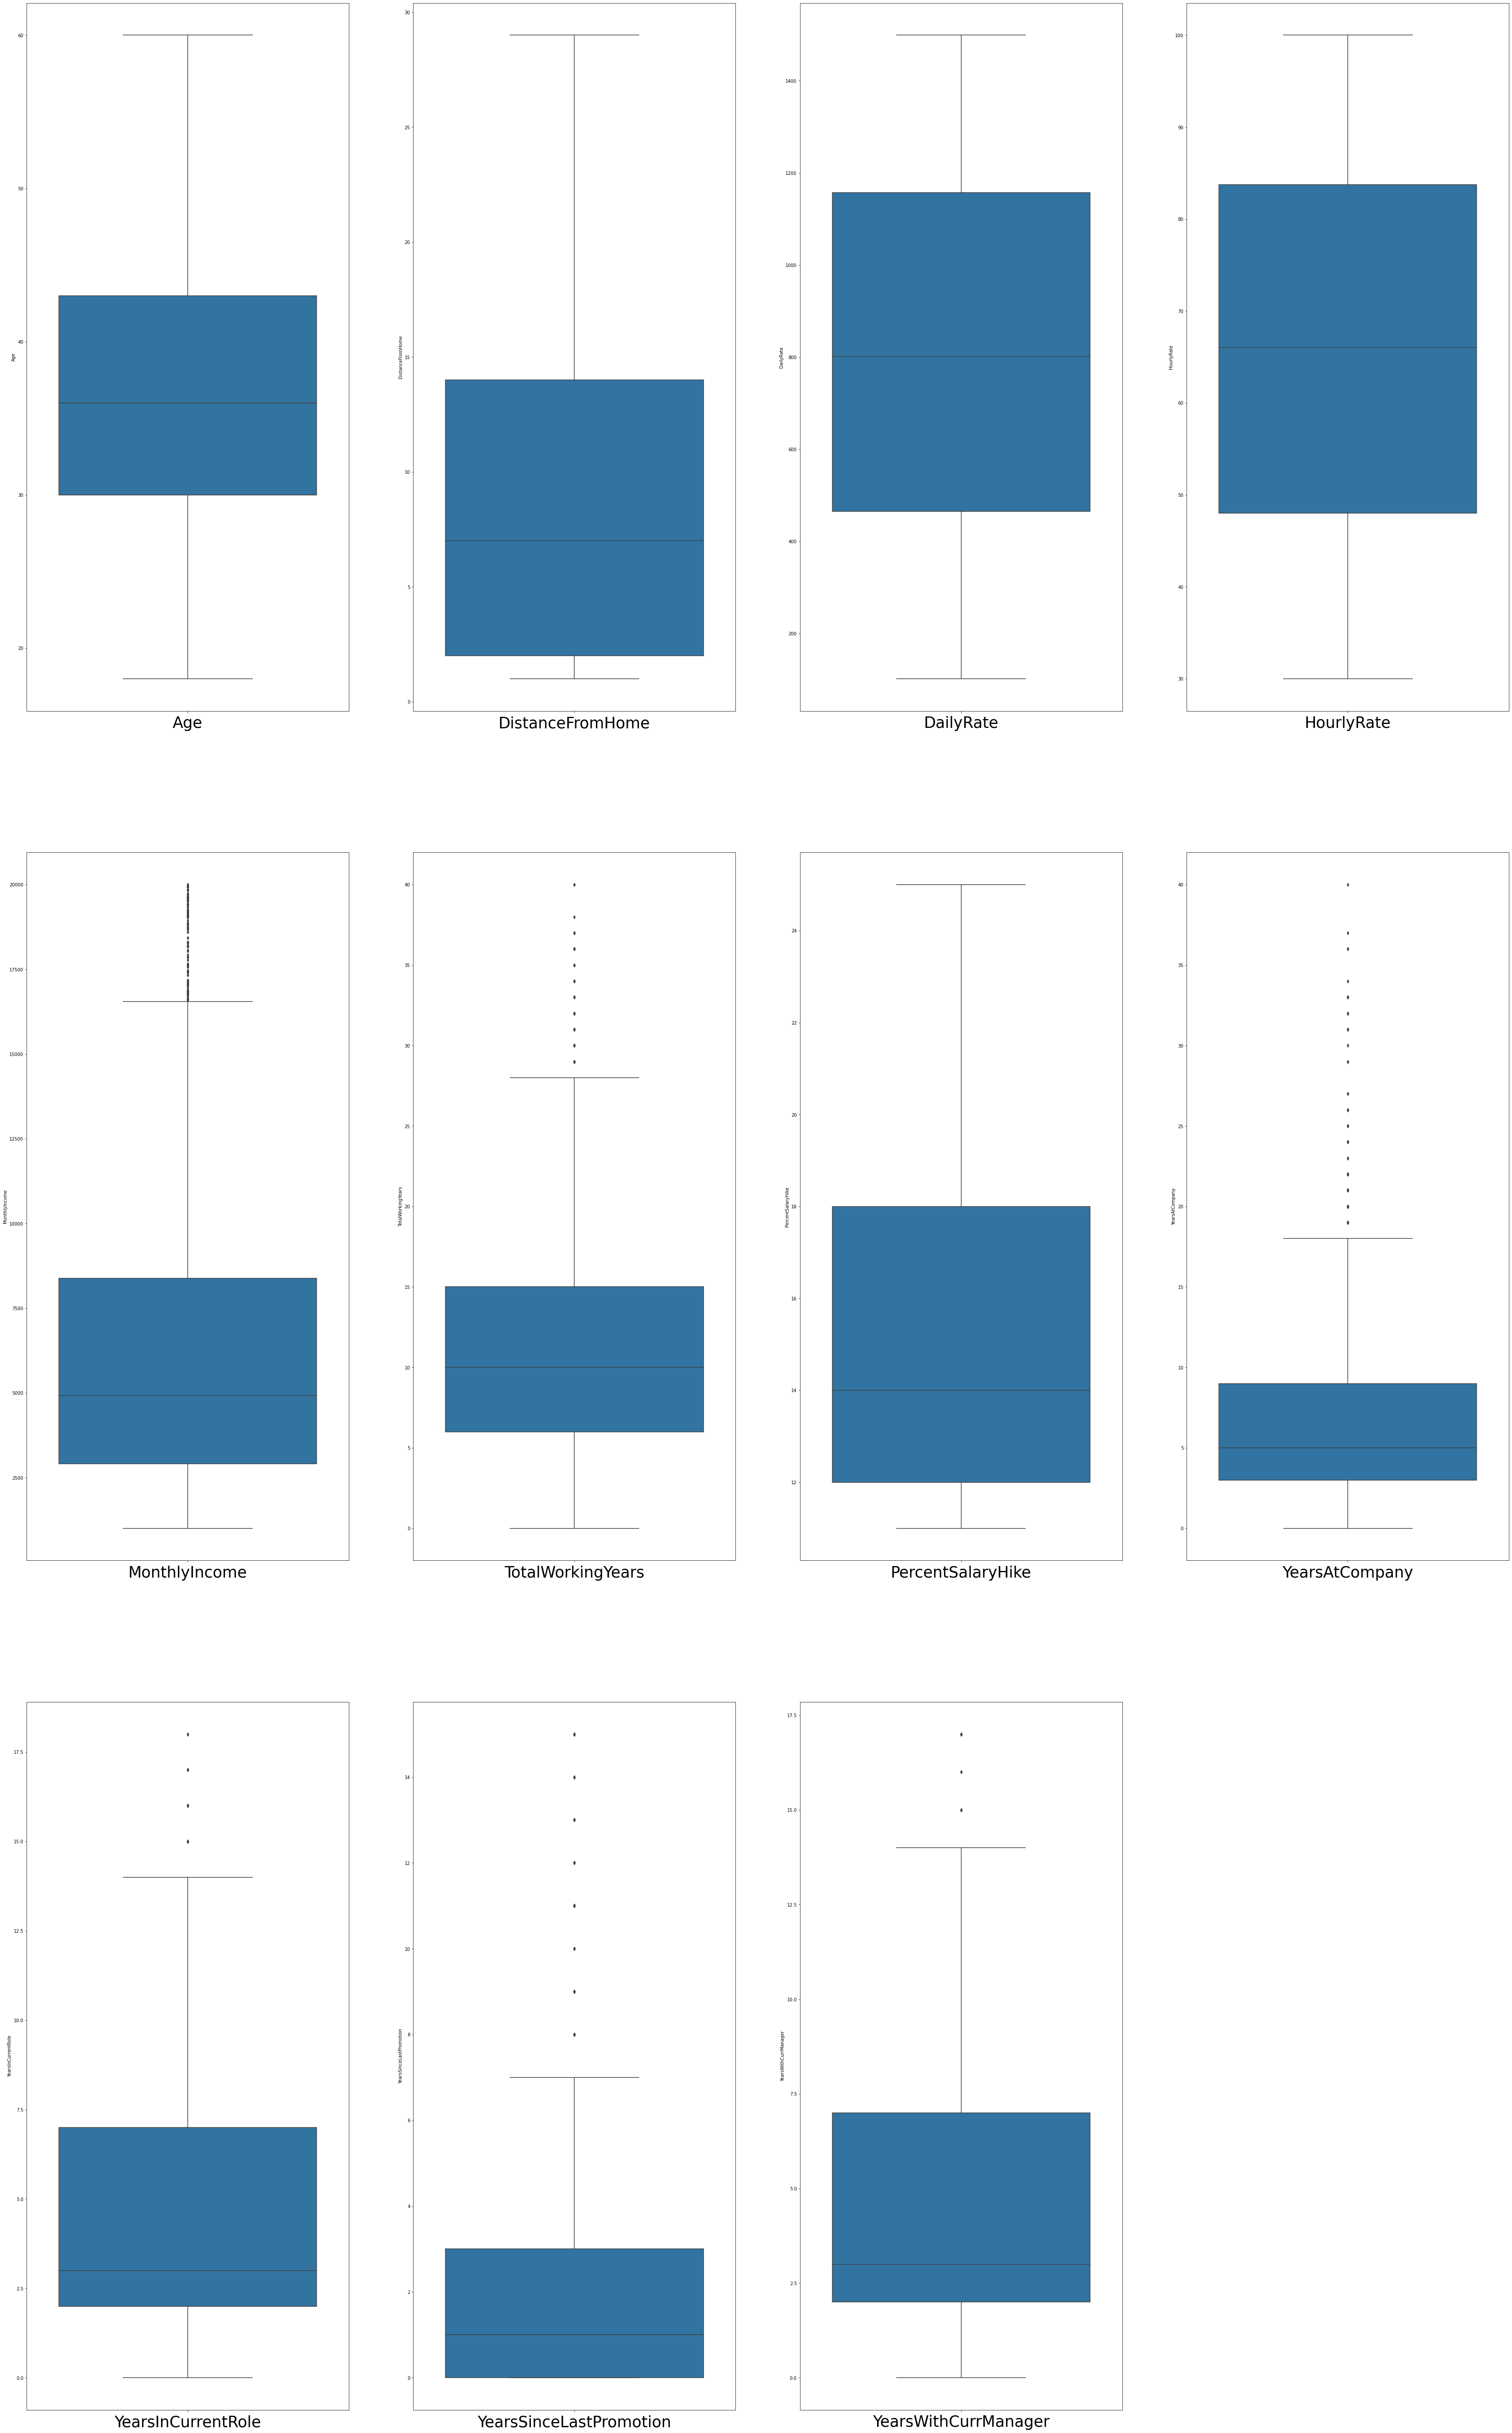

In [185]:
#Outliers/noise checking for input descrete feature columns
plt.figure(figsize=(60,100))
pltno = 1
for columns in discrete:
    if pltno <=12:
        ax = plt.subplot(3,4,pltno)
        sns.boxplot(y = discrete[columns])
        plt.xlabel(columns, fontsize=35)       
    pltno += 1
plt.show()

'MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' these columns has outliers, same to be treated before training the model

In [186]:
#Statistical summary of the data
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1470.000000    1470.000000   1470.000000         1470.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102846    4707.956783   7117.786044            2.498009   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8047.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8379.000000  20461.500000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  


In [187]:
#Coefficient of correlation matrix
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

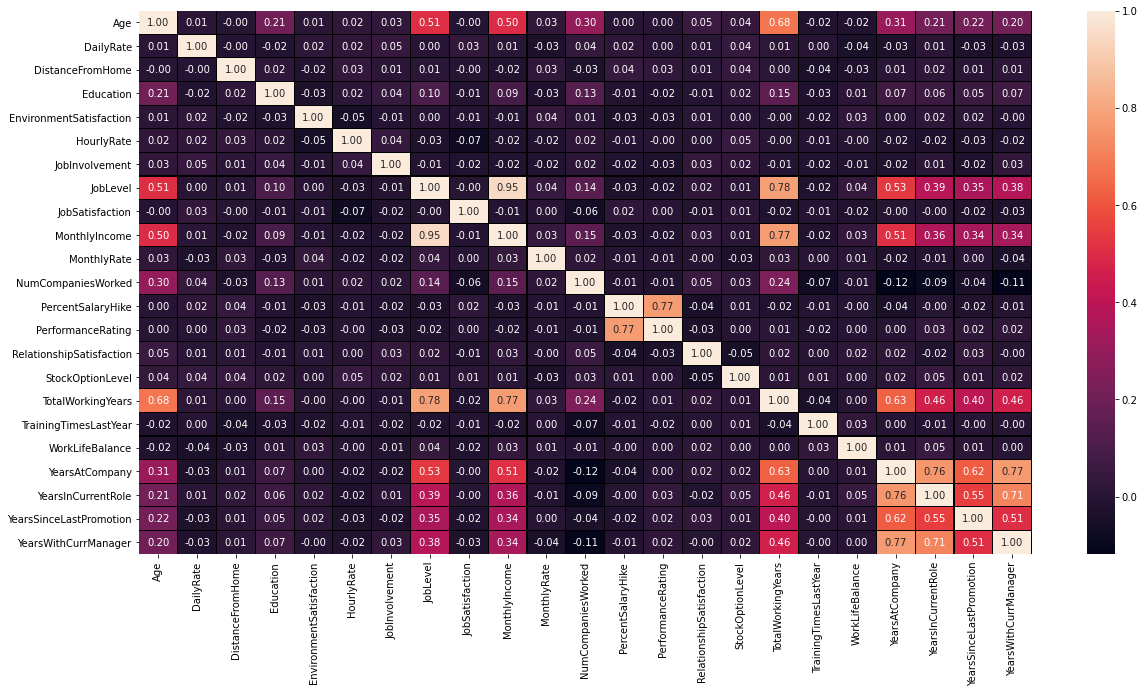

In [188]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

Some of the data 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager' these columns are showing multicollinearity

In [210]:
obj = []
for i in df:
    if df[i].dtype == 'O':
        obj.append(i)    
obj

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [218]:
#Seperating ordinal and other type of categorical data
obj = ['Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
ordi = ['BusinessTravel']
#Encoding the data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in obj:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['Non-Travel','Travel_Frequently','Travel_Rarely']])
df[ordi] = enc.fit_transform(df[ordi].values.reshape(-1,1))  
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102           2                 1   
1   49          0             1.0        279           1                 8   
2   37          1             2.0       1373           1                 2   
3   33          0             1.0       1392           1                 3   
4   27          0             2.0        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [228]:
#Removing of outliers by zscore method (consider only columns(discrete) which had outliers displayed in boxplot)
columns_with_outliers = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 
                         'YearsSinceLastPromotion','YearsWithCurrManager']
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[columns_with_outliers]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

Shape before (1470, 31)
Shape after (1387, 31)


In [229]:
#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

5.64625850340136 % loss of data


In [230]:
#Seperate feature and target columns
x = df_new.drop(columns=['Attrition'], axis=1)
y = df_new['Attrition']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (1387, 30)
y shape (1387,)


Since input data is discrete in nature, VIF method cannot be applied for checking multicollinearity

And we cannot handle multicollinearity by PCA technique

In order to handle feature selection (reduce curse of dimensionality / handling multicollinearity) let us use chi2 method

In [249]:
#Feature selection
from sklearn.feature_selection import SelectPercentile, chi2
per = SelectPercentile(score_func=chi2, percentile=70) #Specified to retain 70% of features in feature selection process
per = per.fit(x,y)
df_scores = pd.DataFrame({'Feature':x.columns, 'Chi2':per.scores_, 'p value':per.pvalues_})
df_scores.sort_values(by='Chi2', ascending=False)

Feature           Chi2        p value
15             MonthlyIncome  108739.104549   0.000000e+00
16               MonthlyRate    1066.236327  7.199964e-234
2                  DailyRate     915.089308  5.147740e-201
23         TotalWorkingYears     208.070075   3.621844e-47
26            YearsAtCompany     137.733136   8.335899e-32
27        YearsInCurrentRole     110.331536   8.289928e-26
29      YearsWithCurrManager     102.024111   5.485008e-24
0                        Age      75.845872   3.066929e-18
4           DistanceFromHome      66.101135   4.283689e-16
18                  OverTime      65.641342   5.409209e-16
22          StockOptionLevel      23.873727   1.028661e-06
11                  JobLevel      21.624943   3.315125e-06
14             MaritalStatus      17.292120   3.205133e-05
17        NumCompaniesWorked       8.191525   4.208653e-03
13           JobSatisfaction       7.994182   4.692790e-03
12                   JobRole       7.828838   5.141916e-03
7    EnvironmentSatisfaction       7.640280   5.707904e-03
10            JobInvolvement       4.577980   3.238538e-02
28   YearsSinceLastPromotion       4.175724   4.100703e-02
24     TrainingTimesLastYear       2.706628   9.993203e-02
21  RelationshipSatisfaction       1.642923   1.999248e-01
3                 Department       1.231681   2.670803e-01
25           WorkLifeBalance       0.973851   3.237215e-01
8                     Gender       0.725432   3.943678e-01
6             EducationField       0.609980   4.347955e-01
5                  Education       0.535825   4.641682e-01
19         PercentSalaryHike       0.047112   8.281670e-01
9                 HourlyRate       0.020329   8.866218e-01
20         PerformanceRating       0.006621   9.351461e-01
1             BusinessTravel       0.000417   9.837087e-01

p value < 0.05 is statistically significant

Sowe have to reject the feature columns below 'YearsSinceLastPromotion' from the above table, as below it all p > 0.05 making features statistically insignificant

We have two option, 

1) We can manually select columns till 'YearsSinceLastPromotion' from top 

2) Or else we can use index method to select automatically, by reducing percentile parameter to optimum level such that index we get for all columns having desired p value lesser than 0.05

In [251]:
#After reducing of 70% in number of feature columns
index = per.get_support(indices=True)
features = x.columns[index]
index

array([ 0,  2,  4,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24,
       26, 27, 28, 29], dtype=int64)

But 70% was not optimum, it has retained 21 and 24th columns, need to refine feature selection

In [254]:
#Feature selection refinement
per = SelectPercentile(score_func=chi2, percentile=65) #Specified to retain 65% of features in feature selection process
per = per.fit(x,y)
df_scores = pd.DataFrame({'Feature':x.columns, 'Chi2':per.scores_, 'p value':per.pvalues_})

#After reducing of 65% in number of feature columns
index = per.get_support(indices=True)
features = x.columns[index]
index

array([ 0,  2,  4,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 26, 27,
       28, 29], dtype=int64)

Therefore p value lesser than 0.05 selected as these columns are statistically significant for prediction model

In [255]:
x = x[features]
y = y
print('x shape',x.shape)
print('y shape',y.shape)

x shape (1387, 19)
y shape (1387,)


Therefore 19 out of 31 input feature columns retained after feature selection process

In [257]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [264]:
#Checking skewness of input feature (discrete numerical) data columns
discrete = ['Age','DistanceFromHome','MonthlyIncome','MonthlyRate']
x[discrete].skew()

Age                 0.472280
DistanceFromHome    0.954752
MonthlyIncome       1.544770
MonthlyRate         0.030596
dtype: float64

In [265]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer(method='yeo-johnson')

for i in discrete:
    if x[i].skew() > 0.5:
        x[i] = po.fit_transform(x[i].values.reshape(-1,1))
        
x[discrete].skew()

Age                 0.472280
DistanceFromHome   -0.008149
MonthlyIncome       0.027700
MonthlyRate         0.030596
dtype: float64

Skewness of data within limit of +-0.5 

In [266]:
#Balancing of imbalance label data by SMOTE technique (sampling)
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Before target',Counter(y))

smt = SMOTE('all')
x_new, y_new = smt.fit_resample(x, y)

print('After target', Counter(y_new))

Before target Counter({0: 1158, 1: 229})
After target Counter({1: 1158, 0: 1158})


In [268]:
#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [274]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.8812949640287769
At Max RS 6 Max Accuracy = 0.8920863309352518
At Max RS 56 Max Accuracy = 0.9028776978417267
At Max RS 109 Max Accuracy = 0.920863309352518


In [280]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=109,test_size=0.2)

#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8584310189359784
Accuracy score of testing is : 0.920863309352518 
Testing classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       243
           1       0.84      0.46      0.59        35

    accuracy                           0.92       278
   macro avg       0.88      0.72      0.77       278
weighted avg       0.92      0.92      0.91       278



In [285]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8637330488915503
At CV = 3 , CV score = 0.8644591549559152
At CV = 4 , CV score = 0.8644533657610235
At CV = 5 , CV score = 0.8673428044567956
At CV = 6 , CV score = 0.8666032243618451
At CV = 7 , CV score = 0.8658733784361924
At CV = 8 , CV score = 0.8673302438376187
At CV = 9 , CV score = 0.8665968440161989
At CV = 10 , CV score = 0.8659159628818685

Least difference of CV score and accuracy (f1) score of testing is : 0.053520504895722465


The model is little overfitting as there is 5% difference observed

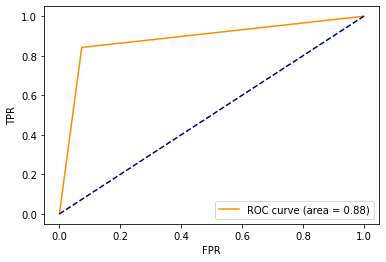

Confusion matrix:
 [[240   3]
 [ 19  16]] 

Area under curve = 0.8843730948994107


In [288]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [289]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score testing' ,'CV score', 'Difference b/w CV sore and accuracy','AUC value'])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0  Logistic regression                   0.920863  0.867343   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373

In [355]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 1.0
Accuracy score of testing is : 0.8489208633093526 
Testing classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       243
           1       0.41      0.46      0.43        35

    accuracy                           0.85       278
   macro avg       0.67      0.68      0.67       278
weighted avg       0.86      0.85      0.85       278



In [356]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.7772236569066541
At CV = 3 , CV score = 0.8024412592447149
At CV = 4 , CV score = 0.798135546634239
At CV = 5 , CV score = 0.7930706698179362
At CV = 6 , CV score = 0.7916635567497637
At CV = 7 , CV score = 0.7844163095419378
At CV = 8 , CV score = 0.7808243638296459
At CV = 9 , CV score = 0.7757668854443048
At CV = 10 , CV score = 0.7836930455635491

Least difference of CV score and accuracy (f1) score of testing is : 0.04647960406463769


The model is little overfitting as there is 4% difference observed. Let us tune the parameters and check.

In [357]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[2,4,6,8],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       splitter='random')


In [384]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',splitter='random')
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8403967538322813
Accuracy score of testing is : 0.8812949640287769 
Testing classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       243
           1       0.67      0.11      0.20        35

    accuracy                           0.88       278
   macro avg       0.78      0.55      0.57       278
weighted avg       0.86      0.88      0.84       278



In [385]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8341619155740193
At CV = 3 , CV score = 0.8356131509479242
At CV = 4 , CV score = 0.8356161816394863
At CV = 5 , CV score = 0.8356180037919124
At CV = 6 , CV score = 0.8370621237000547
At CV = 7 , CV score = 0.8356211069778909
At CV = 8 , CV score = 0.8450019932230417
At CV = 9 , CV score = 0.8363403621468138
At CV = 10 , CV score = 0.8356271504535501

Least difference of CV score and accuracy (f1) score of testing is : 0.036292970805735236


The parameter tuned model of DTC is giving good results compared to previous algorithms

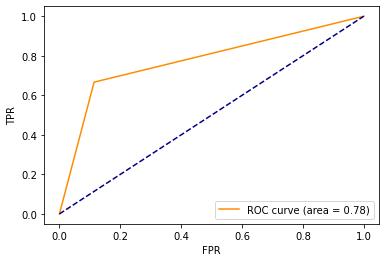

Confusion matrix:
 [[241   2]
 [ 31   4]] 

Area under curve = 0.7763480392156862


In [386]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [392]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0       Logistic regression                   0.920863  0.867343   
1  Decision tree classifier                   0.881295  0.845002   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348

In [394]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8836789900811542
Accuracy score of testing is : 0.8920863309352518 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.78      0.20      0.32        35

    accuracy                           0.89       278
   macro avg       0.84      0.60      0.63       278
weighted avg       0.88      0.89      0.86       278



In [395]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8550812779919408
At CV = 3 , CV score = 0.860854767982198
At CV = 4 , CV score = 0.8608531425430195
At CV = 5 , CV score = 0.8622912500324651
At CV = 6 , CV score = 0.8608592078419665
At CV = 7 , CV score = 0.8644630076790881
At CV = 8 , CV score = 0.8608688791442429
At CV = 9 , CV score = 0.8594144207047433
At CV = 10 , CV score = 0.8587060786153685

Least difference of CV score and accuracy (f1) score of testing is : 0.02762332325616368


In [396]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':range(50,500,50),
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

SVC(max_iter=200, tol=0.0001)


In [397]:
#Training model as per best parameters
model = SVC(max_iter=200, tol=0.0001)
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8872858431018936
Accuracy score of testing is : 0.8884892086330936 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.70      0.20      0.31        35

    accuracy                           0.89       278
   macro avg       0.80      0.59      0.63       278
weighted avg       0.87      0.89      0.86       278



In [398]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8558017390870416
At CV = 3 , CV score = 0.8615778270205916
At CV = 4 , CV score = 0.8586938415152171
At CV = 5 , CV score = 0.8658987611354959
At CV = 6 , CV score = 0.862302209284968
At CV = 7 , CV score = 0.8644702589426208
At CV = 8 , CV score = 0.8587012490864394
At CV = 9 , CV score = 0.8622957687473816
At CV = 10 , CV score = 0.8608799916588469

Least difference of CV score and accuracy (f1) score of testing is : 0.022590447497597643


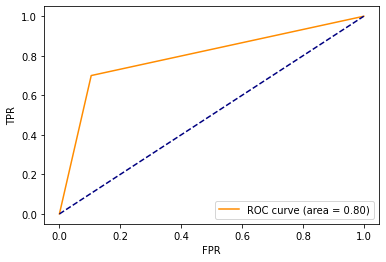

Confusion matrix:
 [[240   3]
 [ 28   7]] 

Area under curve = 0.7977611940298507


In [399]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [402]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Support vector classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0        Logistic regression                   0.920863  0.867343   
1   Decision tree classifier                   0.881295  0.845002   
2  Support vector classifier                   0.888489  0.865899   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348  
2                             0.022590   0.797761

In [405]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8800721370604148
Accuracy score of testing is : 0.89568345323741 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.80      0.23      0.36        35

    accuracy                           0.90       278
   macro avg       0.85      0.61      0.65       278
weighted avg       0.89      0.90      0.87       278



In [406]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.844992743407729
At CV = 3 , CV score = 0.8457110444151481
At CV = 4 , CV score = 0.8464272625809999
At CV = 5 , CV score = 0.8493078461418591
At CV = 6 , CV score = 0.846422973578146
At CV = 7 , CV score = 0.8507472427070418
At CV = 8 , CV score = 0.8471447079928244
At CV = 9 , CV score = 0.8471442535958664
At CV = 10 , CV score = 0.8478730059430715

Least difference of CV score and accuracy (f1) score of testing is : 0.044936210530368226


In [407]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,10), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[15,25,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=15, n_neighbors=6, weights='distance')


In [411]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=15, n_neighbors=6, weights='distance')
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 1.0
Accuracy score of testing is : 0.8992805755395683 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       243
           1       0.89      0.23      0.36        35

    accuracy                           0.90       278
   macro avg       0.89      0.61      0.65       278
weighted avg       0.90      0.90      0.87       278



In [412]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8464305467187312
At CV = 3 , CV score = 0.8435449839337529
At CV = 4 , CV score = 0.850035814829005
At CV = 5 , CV score = 0.8529205516453263
At CV = 6 , CV score = 0.8521949793501519
At CV = 7 , CV score = 0.8529153705033102
At CV = 8 , CV score = 0.854361836422829
At CV = 9 , CV score = 0.8529162593678722
At CV = 10 , CV score = 0.85004691898655

Least difference of CV score and accuracy (f1) score of testing is : 0.04491873911673927


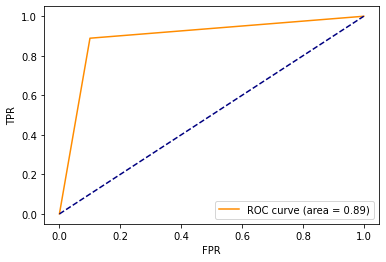

Confusion matrix:
 [[242   1]
 [ 27   8]] 

Area under curve = 0.8942585708384965


In [413]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [414]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0        Logistic regression                   0.920863  0.867343   
1   Decision tree classifier                   0.881295  0.845002   
2  Support vector classifier                   0.888489  0.865899   
3             KNN classifier                   0.899281  0.854362   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348  
2                             0.022590   0.797761  
3                             0.044919   0.894259

In [416]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.8890892696122633
Accuracy score of testing is : 0.9100719424460432 
Testing classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       243
           1       0.75      0.43      0.55        35

    accuracy                           0.91       278
   macro avg       0.84      0.70      0.75       278
weighted avg       0.90      0.91      0.90       278



In [417]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8579693601307434
At CV = 3 , CV score = 0.8659052730327028
At CV = 4 , CV score = 0.8594226316403191
At CV = 5 , CV score = 0.8608472067111654
At CV = 6 , CV score = 0.8702231676369608
At CV = 7 , CV score = 0.8694917589389951
At CV = 8 , CV score = 0.8630032888180188
At CV = 9 , CV score = 0.8673416189545221
At CV = 10 , CV score = 0.8709884266499843

Least difference of CV score and accuracy (f1) score of testing is : 0.03908351579605884


In [418]:
# Hyper parameter tuning for adaboost model
from sklearn.model_selection import GridSearchCV
parameters = { 'algorithm':['SAMME', 'SAMME.R'], 
              'n_estimators':[25,30,50,60,75], 
              'learning_rate' :[0.1, 1, 10], 
              'random_state':[25,30,35,40,45]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=75,
                   random_state=25)


In [419]:
#Training model as per best parameters
model = AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=75,random_state=25)
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.872858431018936
Accuracy score of testing is : 0.8992805755395683 
Testing classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       243
           1       0.71      0.34      0.46        35

    accuracy                           0.90       278
   macro avg       0.81      0.66      0.70       278
weighted avg       0.89      0.90      0.88       278



In [420]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8659037888144516
At CV = 3 , CV score = 0.8738324310678522
At CV = 4 , CV score = 0.8731155569622362
At CV = 5 , CV score = 0.8738306106017714
At CV = 6 , CV score = 0.8723814499676569
At CV = 7 , CV score = 0.8745495152530329
At CV = 8 , CV score = 0.8774541558700418
At CV = 9 , CV score = 0.8781315458734813
At CV = 10 , CV score = 0.8767333958919821

Least difference of CV score and accuracy (f1) score of testing is : 0.021149029666087005


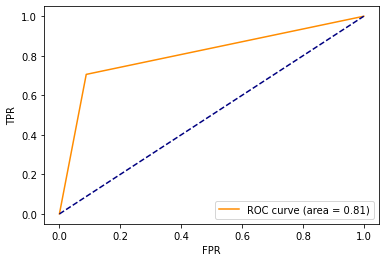

Confusion matrix:
 [[238   5]
 [ 23  12]] 

Area under curve = 0.808879873788596


In [421]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [422]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Adaboost classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0        Logistic regression                   0.920863  0.867343   
1   Decision tree classifier                   0.881295  0.845002   
2  Support vector classifier                   0.888489  0.865899   
3             KNN classifier                   0.899281  0.854362   
4        Adaboost classifier                   0.899281  0.878132   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348  
2                             0.022590   0.797761  
3                             0.044919   0.894259  
4                             0.021149   0.808880

In [428]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 1.0
Accuracy score of testing is : 0.89568345323741 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.80      0.23      0.36        35

    accuracy                           0.90       278
   macro avg       0.85      0.61      0.65       278
weighted avg       0.89      0.90      0.87       278



In [429]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8529188550802383
At CV = 3 , CV score = 0.8543643781224776
At CV = 4 , CV score = 0.8572445902950143
At CV = 5 , CV score = 0.853639976105758
At CV = 6 , CV score = 0.8587009255112702
At CV = 7 , CV score = 0.8565228741108137
At CV = 8 , CV score = 0.8550802272274267
At CV = 9 , CV score = 0.8572592282269702
At CV = 10 , CV score = 0.8543634657491397

Least difference of CV score and accuracy (f1) score of testing is : 0.03698252772613986


In [430]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[100,125,150,200], 
              'criterion':["gini", "entropy"], 
              'max_depth' :[5, 10, 15, 20], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2')


In [431]:
#Training model as per best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2')
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 1.0
Accuracy score of testing is : 0.8920863309352518 
Testing classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.78      0.20      0.32        35

    accuracy                           0.89       278
   macro avg       0.84      0.60      0.63       278
weighted avg       0.88      0.89      0.86       278



In [432]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8550833572447405
At CV = 3 , CV score = 0.8601317089438041
At CV = 4 , CV score = 0.8572445902950143
At CV = 5 , CV score = 0.858683738929434
At CV = 6 , CV score = 0.8579763148728666
At CV = 7 , CV score = 0.8536441224883438
At CV = 8 , CV score = 0.8572520098332337
At CV = 9 , CV score = 0.853656379462831
At CV = 10 , CV score = 0.8558023146700032

Least difference of CV score and accuracy (f1) score of testing is : 0.03195462199144772


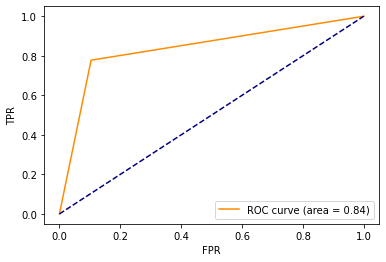

Confusion matrix:
 [[241   2]
 [ 28   7]] 

Area under curve = 0.8368442792234614


In [433]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [434]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0        Logistic regression                   0.920863  0.867343   
1   Decision tree classifier                   0.881295  0.845002   
2  Support vector classifier                   0.888489  0.865899   
3             KNN classifier                   0.899281  0.854362   
4        Adaboost classifier                   0.899281  0.878132   
5   Random forest classifier                   0.892086  0.860132   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348  
2                             0.022590   0.797761  
3                             0.044919   0.894259  
4                             0.021149   0.808880  
5                             0.031955   0.836844

In [439]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.9404869251577999
Accuracy score of testing is : 0.9064748201438849 
Testing classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       243
           1       0.76      0.37      0.50        35

    accuracy                           0.91       278
   macro avg       0.84      0.68      0.72       278
weighted avg       0.90      0.91      0.89       278



In [440]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.851482091395636
At CV = 3 , CV score = 0.8615793853374848
At CV = 4 , CV score = 0.8623065582782229
At CV = 5 , CV score = 0.8666207827961457
At CV = 6 , CV score = 0.8586915957605613
At CV = 7 , CV score = 0.8687920120080924
At CV = 8 , CV score = 0.8615872699488406
At CV = 9 , CV score = 0.8651817716333845
At CV = 10 , CV score = 0.863033051819414

Least difference of CV score and accuracy (f1) score of testing is : 0.0376828081357925


In [441]:
# Hyper parameter tuning of Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'loss':['deviance', 'exponential'],
              'n_estimators':[50,100,150], 
              'learning_rate' : [0.01, 0.1, 1],
              'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingClassifier(loss='exponential')


In [442]:
#Training model as per best parameters
model = GradientBoostingClassifier(loss='exponential')
model.fit(xtr,ytr)
predytr = model.predict(xtr)
acc_tr = accuracy_score(ytr, predytr)
predyt = model.predict(xt)
acc_t = accuracy_score(yt, predyt)
print('Accuracy score of training is :',acc_tr)
print('Accuracy score of testing is :',acc_t,'\nTesting classification report:')
print(classification_report(yt, predyt))

Accuracy score of training is : 0.915238954012624
Accuracy score of testing is : 0.8992805755395683 
Testing classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       243
           1       0.77      0.29      0.42        35

    accuracy                           0.90       278
   macro avg       0.84      0.64      0.68       278
weighted avg       0.89      0.90      0.88       278



In [443]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i,', CV score =',lsc.mean())
    CVS.append(lsc.mean())
least_diff = min(acc_t - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and accuracy (f1) score of testing is :', least_diff)

At CV = 2 , CV score = 0.8529230135858378
At CV = 3 , CV score = 0.8637423291850937
At CV = 4 , CV score = 0.8702295480668321
At CV = 5 , CV score = 0.8666233799963639
At CV = 6 , CV score = 0.8659003831417623
At CV = 7 , CV score = 0.8666166329482914
At CV = 8 , CV score = 0.8680860075742476
At CV = 9 , CV score = 0.8658939626681561
At CV = 10 , CV score = 0.8666510270044834

Least difference of CV score and accuracy (f1) score of testing is : 0.029051027472736246


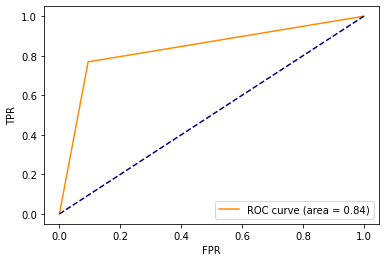

Confusion matrix:
 [[240   3]
 [ 25  10]] 

Area under curve = 0.8374455732946299


In [444]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predyt, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,predyt),'\n')
print('Area under curve =',roc_auc)

In [445]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boost classifier', acc_t, cvs, least_diff,roc_auc] 
model_result

Algorithm name  Accuracy f1 score testing  CV score  \
0        Logistic regression                   0.920863  0.867343   
1   Decision tree classifier                   0.881295  0.845002   
2  Support vector classifier                   0.888489  0.865899   
3             KNN classifier                   0.899281  0.854362   
4        Adaboost classifier                   0.899281  0.878132   
5   Random forest classifier                   0.892086  0.860132   
6  Gradient boost classifier                   0.899281  0.870230   

   Difference b/w CV sore and accuracy  AUC value  
0                             0.053521   0.884373  
1                             0.036293   0.776348  
2                             0.022590   0.797761  
3                             0.044919   0.894259  
4                             0.021149   0.808880  
5                             0.031955   0.836844  
6                             0.029051   0.837446

#Model selection:

Based on model result table shown above we select Gradient boost classifier algorithm

Reason: 

1) Good accuracy score 

2) accuracy score almost equal to CV score, difference is minimal

3) AUC value is also good

In [446]:
#Prediction using selected best model
model = GradientBoostingClassifier(loss='exponential')
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [456]:
table = pd.DataFrame()
table['Actual attrition'] = ['Yes' if i==1 else 'No' for i in yt]
table['Predicted attrition'] = ['Yes' if i==1 else 'No' for i in predyt]
table.sample(10)

Actual attrition Predicted attrition
159              Yes                  No
130               No                  No
89                No                  No
60                No                  No
43                No                  No
172               No                  No
102              Yes                 Yes
147              Yes                 Yes
31               Yes                 Yes
256               No                  No

In [457]:
#Saving the model
import pickle
filename='HR_analytics.pkl'
pickle.dump(model,open(filename,'wb'))